#IMPORT LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ignores = ['/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py']
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# FILL NA VALUES

In [9]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical columns → median
num_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Y=1, N=0

#DEPENDENCIES

In [11]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)

# DROP LOAN ID NO NEED

In [12]:
df.drop('Loan_ID', axis=1, inplace=True)

In [13]:
df = pd.get_dummies(df, drop_first=True)


# LOAN AMOUNT HISTPLOT

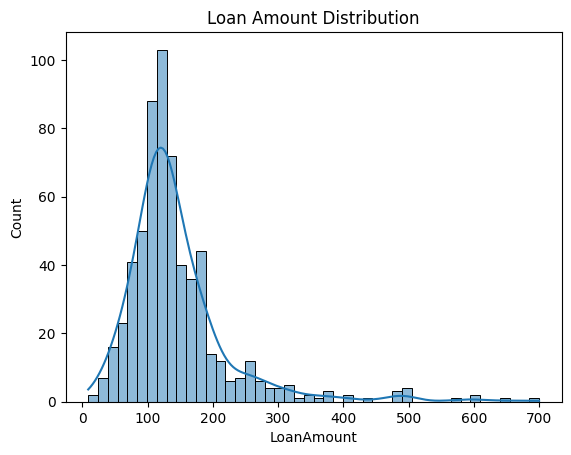

In [14]:
plt.figure()
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

#INCOME VS LOAN BOX PLOT

Text(0.5, 1.0, 'Applicant Income vs Loan Status')

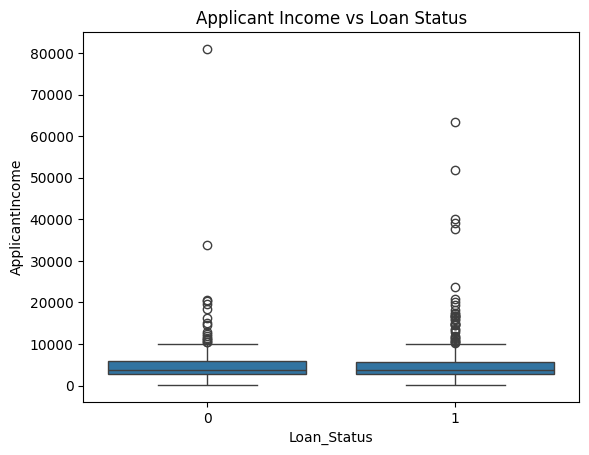

In [15]:
plt.figure()
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'])
plt.title('Applicant Income vs Loan Status')

#EDUCATION VS LOAN STATUS COUNT PLOT

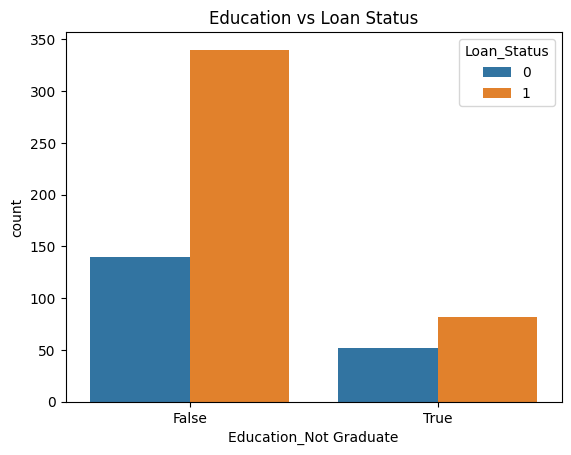

In [16]:
plt.figure()
sns.countplot(x='Education_Not Graduate', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.show()

#INPUT FEATURES AND TARGET VARIABLE

In [18]:

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#MODEL

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)

# ACCURACY

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [24]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


#HEAT MAP CONFUSION MATRIX

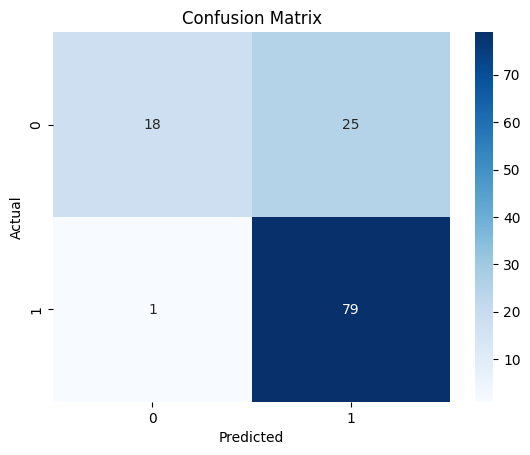

In [25]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()